## Week 6 HW: Granger Causality and VAR models
### Jingwen Li

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Part 1 – 20 pts Exploratory Data Analysis

### 10 pts Perform quantitative and qualitative EDA

In [6]:
data = pd.read_csv('hw6_data_var.csv', index_col=0, parse_dates=True)
data

,PCE,AHE,PCEPI
2006-03-01,9122.1,20.04,88.473
2006-04-01,9174.8,20.17,88.850
2006-05-01,9215.1,20.13,89.070
2006-06-01,9240.8,20.22,89.285
2006-07-01,9322.6,20.30,89.601
...,...,...,...
2019-08-01,14650.9,28.16,110.115
2019-09-01,14673.2,28.15,110.167
2019-10-01,14728.5,28.24,110.377
2019-11-01,14752.8,28.33,110.461


    Numerical

In [3]:
data.describe()

,PCE,AHE,PCEPI
count,166.000000,166.000000,166.000000
mean,11507.872289,23.938193,100.006169
std,1630.579647,2.235573,6.028324
min,9122.100000,20.040000,88.473000
25%,10009.000000,22.237500,95.145000
50%,11204.100000,23.765000,100.861000
75%,12789.900000,25.675000,104.186250
max,14796.300000,28.360000,110.750000


In [4]:
data.isna().sum()

PCE      0
AHE      0
PCEPI    0
dtype: int64

    Visual

<AxesSubplot: >

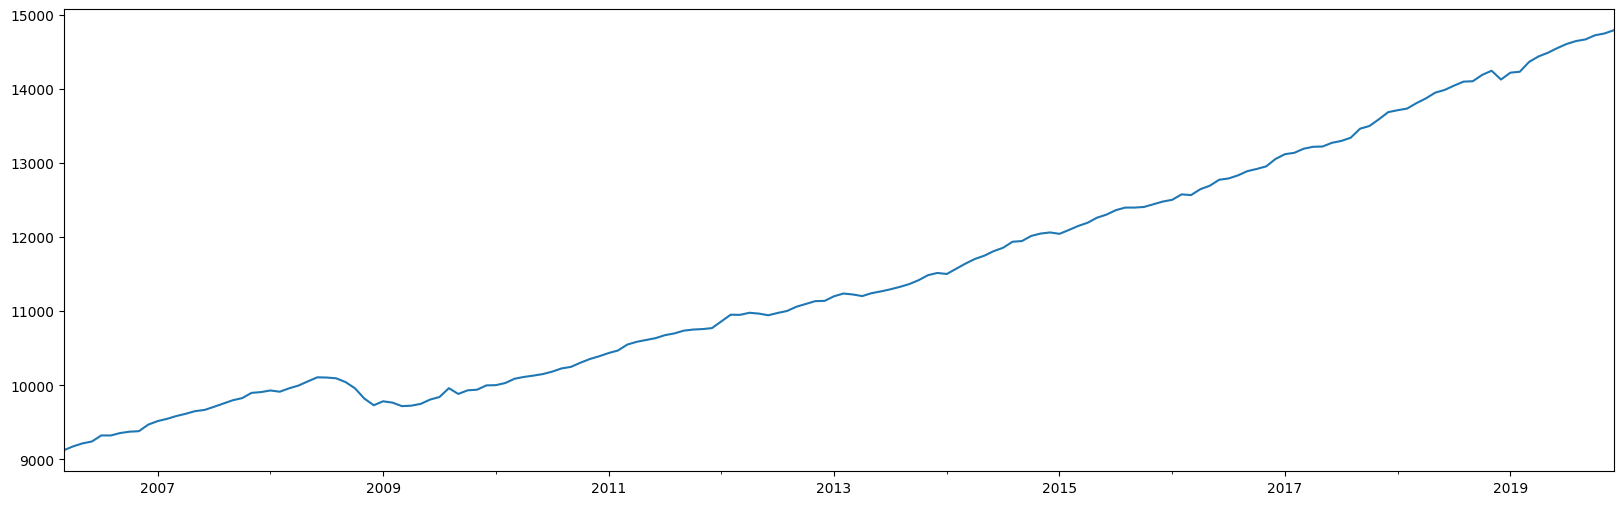

In [5]:
data['PCE'].plot(figsize=(20, 6))

<AxesSubplot: >

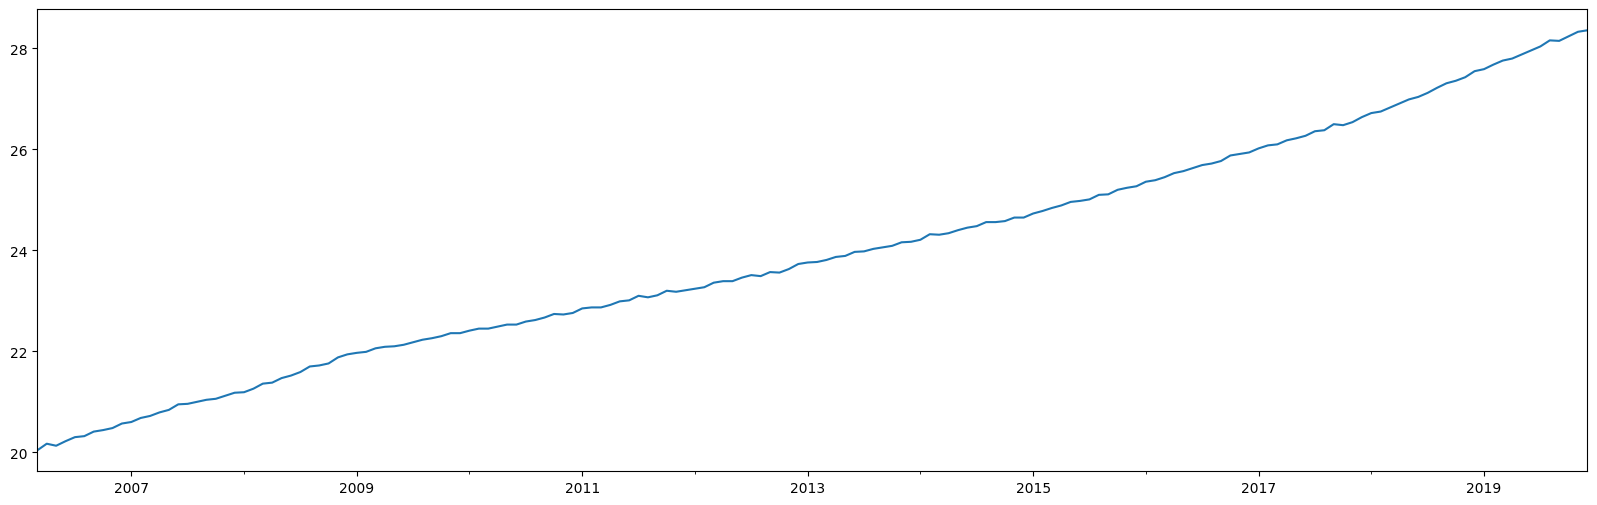

In [6]:
data['AHE'].plot(figsize=(20, 6))

<AxesSubplot: >

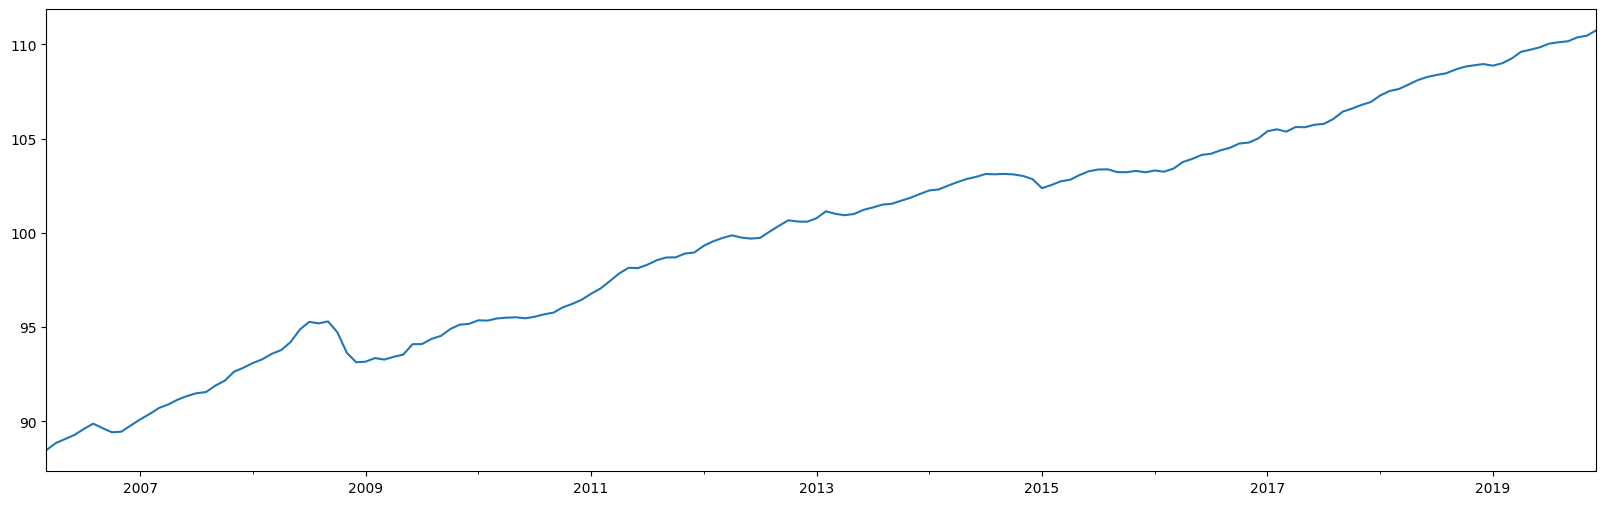

In [7]:
data['PCEPI'].plot(figsize=(20, 6))

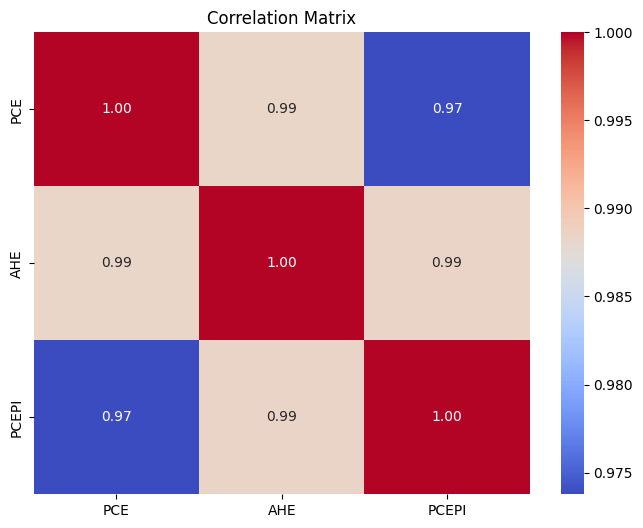

In [8]:
# Calculate the correlation matrix
correlation_matrix = data[['PCE', 'AHE', 'PCEPI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


### 10 pts Give a summary of your findings

The dataset consists of three variables: PCE, AHE, and PCEPI, measured from March 2006 to December 2019. All three variables are highly correlated, albeit on different scales, and display an upward trend. This suggests a positive relationship, indicating that as personal consumption expenditures increase, average hourly earnings and the price level of personal consumption expenditures also tend to increase.

## Part 2 – 40 pts Granger Causality

### 8 pts Consider PCE and AHE, give an intuitive description of the relationship between the two economic measures. This is your opinion, looking for logic and understanding not right or wrong


 AHE represents the average earnings received by individuals for their work on an hourly basis. As AHE increases, it implies that individuals have higher incomes available for spending. Consequently, higher AHE can contribute to an increase in PCE, as individuals have more disposable income to allocate towards consumption.

### 8 pts Difference the two variables

In [7]:
df = data[['AHE', 'PCE']]

In [8]:
diff = data.shift(1)
diff.dropna(inplace=True)

### 8 pts Check Granger Causality for the direction you stated in 2A, return plot of results

In [11]:
alpha=0.05

In [12]:
granger_results = grangercausalitytests(df, maxlag=6, verbose=True)
granger_results


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.5606 , p=0.0000  , df_denom=162, df_num=1
ssr based chi2 test:   chi2=18.9043 , p=0.0000  , df=1
likelihood ratio test: chi2=17.8976 , p=0.0000  , df=1
parameter F test:         F=18.5606 , p=0.0000  , df_denom=162, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9196 , p=0.0000  , df_denom=159, df_num=2
ssr based chi2 test:   chi2=39.0291 , p=0.0000  , df=2
likelihood ratio test: chi2=35.0112 , p=0.0000  , df=2
parameter F test:         F=18.9196 , p=0.0000  , df_denom=159, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.4343 , p=0.0000  , df_denom=156, df_num=3
ssr based chi2 test:   chi2=73.4574 , p=0.0000  , df=3
likelihood ratio test: chi2=60.6389 , p=0.0000  , df=3
parameter F test:         F=23.4343 , p=0.0000  , df_denom=156, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.4702 , p=0.0000  

{1: ({'ssr_ftest': (18.560603411115107, 2.8452539922641415e-05, 162.0, 1),
   'ssr_chi2test': (18.904318289098722, 1.3744119984576158e-05, 1),
   'lrtest': (17.897572961119977, 2.331182092722319e-05, 1),
   'params_ftest': (18.560603411119626, 2.8452539922581e-05, 162.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (18.919577403972966, 4.258021035362499e-08, 159.0, 2),
   'ssr_chi2test': (39.02906533649769, 3.3492390430222712e-09, 2),
   'lrtest': (35.011166074420544, 2.4970192155987463e-08, 2),
   'params_ftest': (18.919577403966443, 4.258021035384925e-08, 159.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (23.434272159526614, 1.4144947129661904e-12, 156.0, 3),
   'ssr_chi2test': (73.45743003851612, 7.756675243122101e-16, 3),
   'lrtest': (60.63893254704567, 4.2927106473895093e-13, 3),
   'params_ftest': (23.434272159508605, 1.4144947129921648e-12, 156.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.

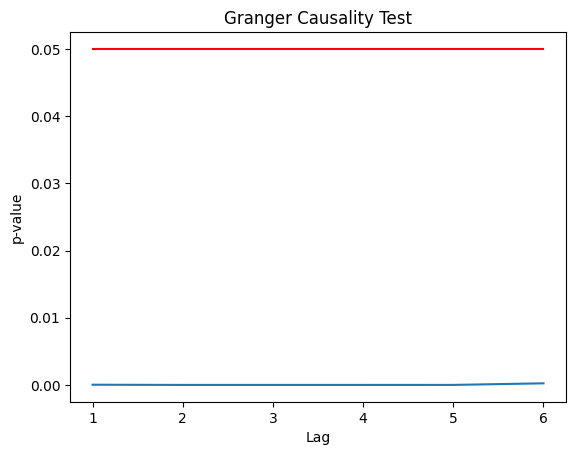

In [46]:
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

We can see from the plot that there is evidence of significant Granger causality between the variables. In each case, the p-values associated with the tests are very low (p=0.0000), indicating strong evidence against the null hypothesis of no Granger causality.

### 8 pts Check Granger Causality for the opposite direction you stated in 2A, return plot of results

In [47]:
df2 = data[['PCE','AHE']]

In [48]:
granger_results_opp = grangercausalitytests(df2, maxlag=6, verbose=False)
granger_results_opp

{1: ({'ssr_ftest': (2.505679151155569e-07, 0.9996012207326612, 162.0, 1),
   'ssr_chi2test': (2.5520806169177094e-07, 0.9995969237239438, 1),
   'lrtest': (2.5520785129629076e-07, 0.9995969238900934, 1),
   'params_ftest': (2.505678905212534e-07, 0.9996012207469732, 162.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.15938208536121637, 0.8528065598368278, 159.0, 2),
   'ssr_chi2test': (0.3287882012482954, 0.8484075980222974, 2),
   'lrtest': (0.3284590627843045, 0.8485472312984783, 2),
   'params_ftest': (0.15938208536177353, 0.8528065598363528, 159.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.25039593793870835, 0.8609624635350636, 156.0, 3),
   'ssr_chi2test': (0.7848949593078742, 0.8530764433253054, 3),
   'lrtest': (0.7830112490830743, 0.85352605325942, 3),
   'params_ftest': (0.25039593793899684, 0.8609624635348604, 156.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
       

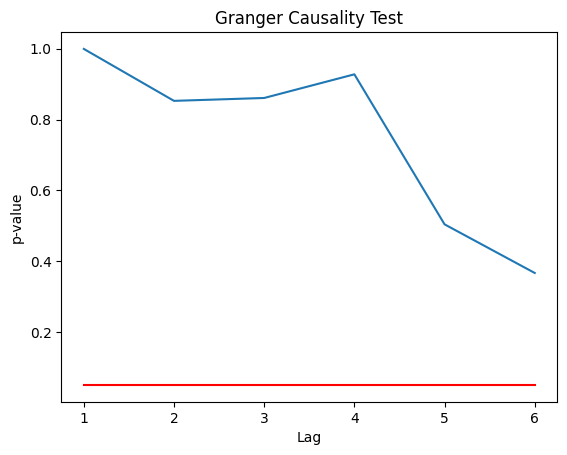

In [49]:
res_list = []
for lag, v in granger_results_opp.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

As we can see from the plot, there is no significant Granger causality on the opposite direction.

### 8 pts Summarize your findings. You must understand the underlying null hypothesis of test.

In summary, the Granger causality tests provide strong evidence supporting the claim that Average Hourly Earnings (AHE) significantly affect Personal Consumption Expenditures (PCE). The statistics consistently show significant p-values at different lag lengths, indicating a causal relationship from AHE to PCE. However, the tests do not provide significant evidence for the reverse relationship, suggesting that PCE does not significantly affect AHE. These findings imply that changes in average hourly earnings have a notable impact on consumer spending behavior, highlighting the important role of wage levels in influencing personal consumption decisions.

## Part 3 – 40 pts VARMA modeling

### 10 pts Using differenced data, run a search to find the best fit order for AH, PCE, and PCEIP, return a plot

In [9]:
diff

,PCE,AHE,PCEPI
2006-04-01,9122.1,20.04,88.473
2006-05-01,9174.8,20.17,88.850
2006-06-01,9215.1,20.13,89.070
2006-07-01,9240.8,20.22,89.285
2006-08-01,9322.6,20.30,89.601
...,...,...,...
2019-08-01,14611.9,28.04,110.042
2019-09-01,14650.9,28.16,110.115
2019-10-01,14673.2,28.15,110.167
2019-11-01,14728.5,28.24,110.377


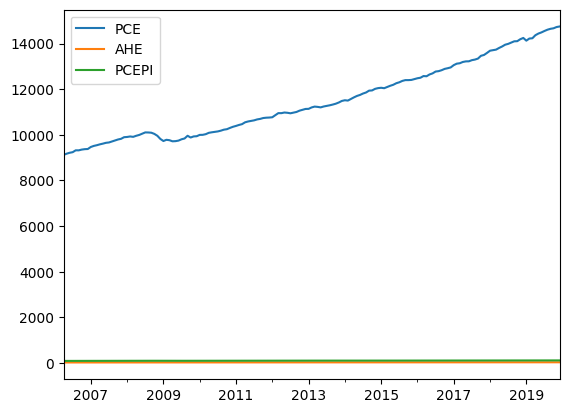

In [10]:
diff.plot()
plt.show()

In [11]:
# Split into train and test
train = diff[:-12]
test = diff[-12:]

In [12]:
var_model = VAR(train)
yhat = var_model.fit().forecast(var_model.endog, steps=1)
print(yhat)

[[14309.69125803    27.4966272    109.05514847]]


In [13]:
results_aic =[]
for p in range(1,10):
    results = var_model.fit(p)
    results_aic.append(results.aic)

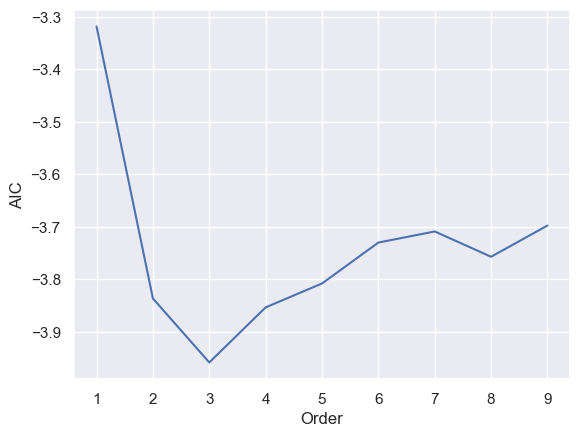

In [14]:
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

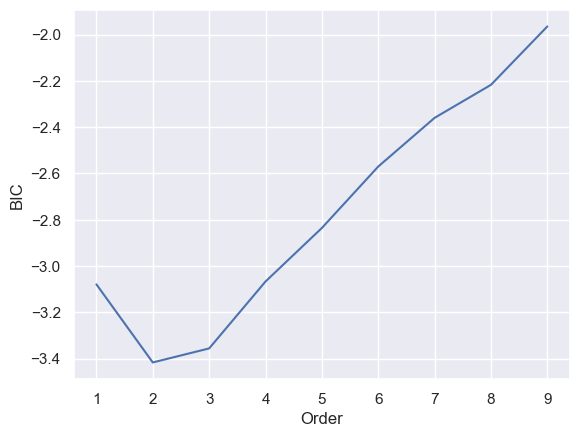

In [15]:
results_bic =[]
for p in range(1,10):
    results = var_model.fit(p)
    results_bic.append(results.bic)
    

plt.plot(list(np.arange(1,10,1)), results_bic)
plt.xlabel("Order")
plt.ylabel("BIC")
plt.show()

- Select the model with the lowest AIC score(order =3 ). This indicates a better balance between model fit and complexity.
- Select the model with the lowest BIC score(order =2 ). This favors simpler models with better fit.

### 10 pts Fit the VAR model with chosen order, return the model summary.

In [16]:
results = var_model.fit(3)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, May, 2023
Time:                     22:36:22
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.35613
Nobs:                     150.000    HQIC:                  -3.71364
Log likelihood:          -311.653    FPE:                  0.0191076
AIC:                     -3.95826    Det(Omega_mle):       0.0157442
--------------------------------------------------------------------
Results for equation PCE
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const          155.152539       134.633461            1.152           0.249
L1.PCE           1.031617         0.100234           10.292           0.000
L1.AHE         -69.743427       100.937784           -0.691           0.490
L1.PCE

### 10 pts Create 12 periods of forecast for all three variables, return plots of predicted values against actual values, Return variable level RMSE (3 total)

In [17]:
yhat = results.forecast(var_model.endog, steps=12)

In [30]:
# clean up yhat
idx=test.index
df_preds = pd.DataFrame(yhat).set_index(idx)
df_preds.columns =['PCE_pred', 'AHE_pred', 'PCEPI_pred']

<AxesSubplot: >

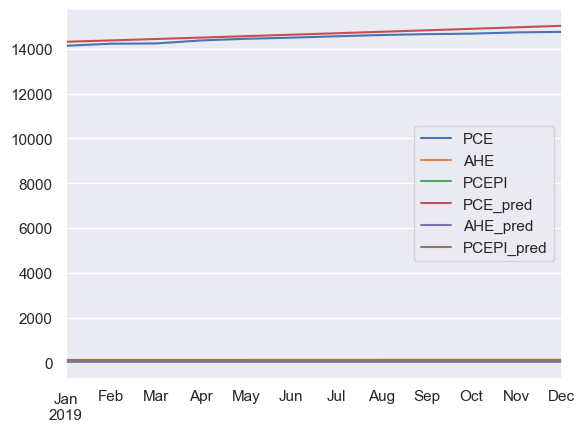

In [31]:
df_results = pd.concat([test,df_preds], axis=1)
df_results.plot()

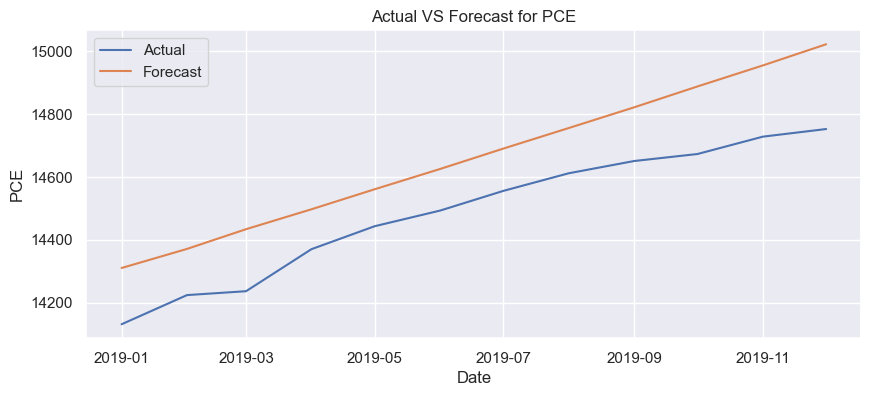

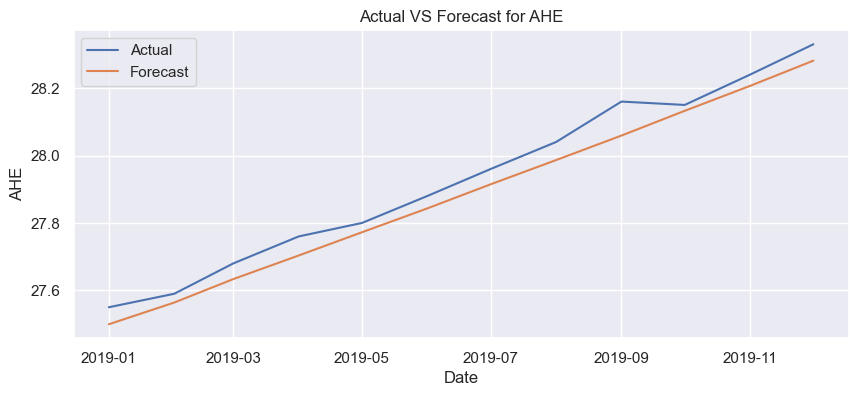

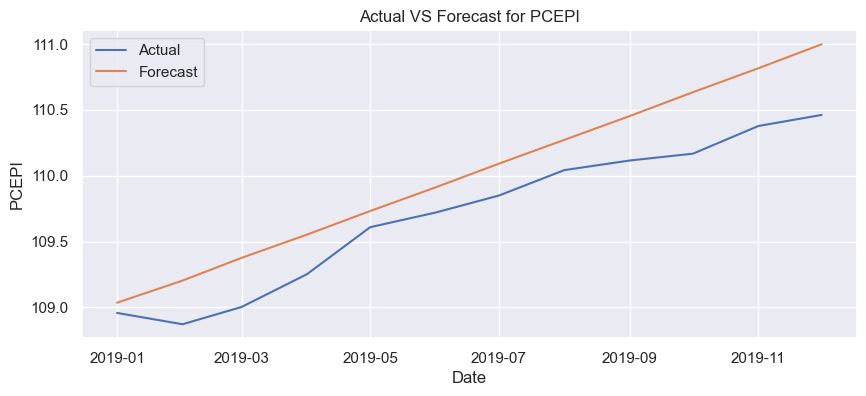

In [26]:
# Plotting the Actual VS Forecast for PCE
plt.figure(figsize=(10,4))
plt.plot(test.index, test['PCE'], label='Actual')
plt.plot(df_preds.index, df_preds['PCE_pred'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('PCE')
plt.title('Actual VS Forecast for PCE')
plt.legend()
plt.show()

# Plotting the Actual VS Forecast for AHE
plt.figure(figsize=(10,4))
plt.plot(test.index, test['AHE'], label='Actual')
plt.plot(df_preds.index, df_preds['AHE_pred'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('AHE')
plt.title('Actual VS Forecast for AHE')
plt.legend()
plt.show()

# Plotting the Actual VS Forecast for PCEPI
plt.figure(figsize=(10,4))
plt.plot(test.index, test['PCEPI'], label='Actual')
plt.plot(df_preds.index, df_preds['PCEPI_pred'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('PCEPI')
plt.title('Actual VS Forecast for PCEPI')
plt.legend()
plt.show()

In [35]:
print('AHE RMSE: ' + str(np.sqrt(mean_squared_error(df_results['AHE'], df_results['AHE_pred']))))
print('PCE RMSE: ' + str(np.sqrt(mean_squared_error(df_results['PCE'], df_results['PCE_pred']))))
print('PCEPI RMSE: ' + str(np.sqrt(mean_squared_error(df_results['PCEPI'], df_results['PCEPI_pred']))))

AHE RMSE: 0.04965198537944559
PCE RMSE: 177.82076915221182
PCEPI RMSE: 0.3316400243257574


### 10 pts What is the advantage of this VAR model? What would ARIMA or prophet models on this dataset look like, if we were asked to forecast AHE?

The advantage of the VAR (Vector Autoregression) model is its ability to capture the dynamic interactions and dependencies among multiple time series variables. By incorporating lagged values of multiple variables, the VAR model can provide a more comprehensive understanding of the relationships and dependencies between these variables.

If we were asked to forecast AHE (Average Hourly Earnings) using the ARIMA (Autoregressive Integrated Moving Average) model, we would focus solely on the time series of AHE itself. ARIMA models are suitable for forecasting univariate time series data by considering the autoregressive (AR), differencing (I), and moving average (MA) components.

On the other hand, if we were to use the Prophet model for forecasting AHE, we would benefit from its additional capabilities, such as handling seasonality, trend changes, and outlier detection. Prophet is a specialized forecasting model developed by Facebook that provides a flexible and intuitive framework for time series forecasting.

In summary, while the VAR model captures the interdependencies among multiple variables, ARIMA and Prophet models focus on forecasting a single variable by leveraging its historical patterns and characteristics. The choice of model depends on the specific requirements of the forecasting task and the nature of the dataset.